## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2022.11.28(월요일) ~ 2022.12.11(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Kaggle의 Personal Key Indicators Heart Disease  데이터를 사용하여 ``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델의 예측결과를 출력하시오**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. createDataPartition을 사용하여 적절하게  Train set과 Test set을 분류하시오.
5. Train set을 사용하여 모델을 생성하시오.
6. Hyperparameter 튜닝을 진행 하시오.
7. Test set을 이용한 Predict(예측) 결과를 confusionMatrix를 사용하여 출력하시오.
```
데이터 링크 : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download


In [ ]:
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
DF <- read.csv(file = "/content/heart_2020_cleaned.csv") ## Data 읽어오기

Confusion Matrix Plot code

In [ ]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

#### 과제에 사용하는 데이터 정상, 비정상 랜덤 추출
 - 정상 데이터 & 비정상 데이터 1000개 랜덤 추출

In [ ]:
HD <- DF[DF$HeartDisease == 1, ]
HD_1000 <- HD[sample(nrow(HD), 1000, replace = F), ]

HC <- DF[DF$HeartDisease == 0, ]
HC_1000 <- HC[sample(nrow(HC), 1000, replace = F), ]

data <- bind_rows(HD_1000, HC_1000)
data <- data[sample(1:nrow(data)), ]

#### 데이터 자료형 변환

In [ ]:
DF <- DF %>% 
 mutate_at(`.vars` = c("Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "HeartDisease"), `.funs` = as.factor)
DF %>% str()

#### **1. 의사결정트리(Decision Tree)**

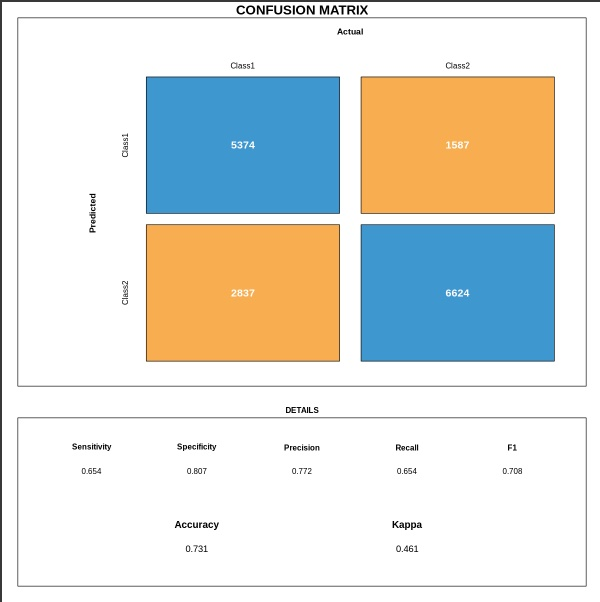

In [ ]:
## 코드 작성

#### **2. 랜덤포레스트(Randomforest)**

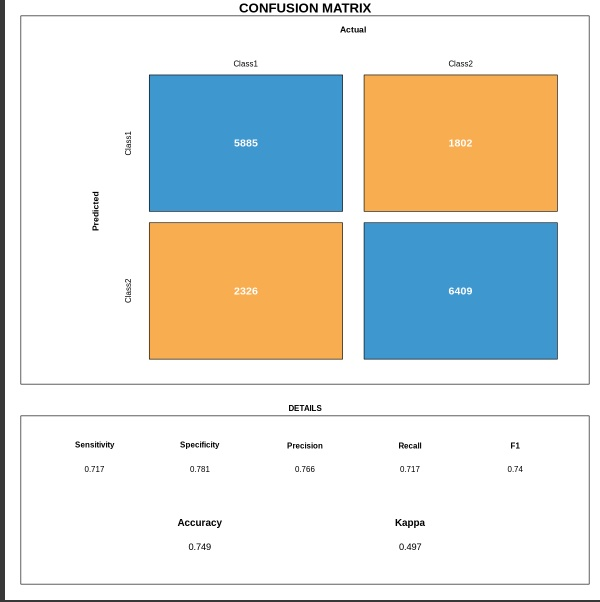

In [ ]:
## 코드 작성

#### **3. SVM(Support Vector Machine)**

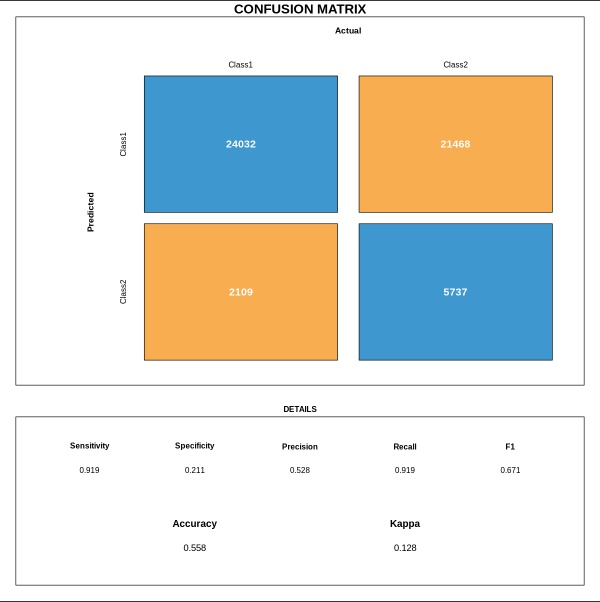

In [ ]:
## 코드 작성